In [1]:
# import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols


In [2]:
# Import dataset
data = pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


# Initial Look at Data to Get Information

In [5]:
data['sqft_above'].value_counts()

1200    282
1300    282
1060    271
1100    268
1250    265
       ... 
1799      1
1783      1
1767      1
7700      1
2049      1
Name: sqft_above, Length: 1187, dtype: int64

In [6]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [7]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [8]:
data['sewer_system'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
30150    False
30151    False
30152    False
30153    False
30154    False
Name: sewer_system, Length: 30155, dtype: bool

# One duplicate in ID, a few nulls in 'Sewer_system' and 'heat_source', could drop these since there are only a few

### Dropping the duplicated ID

In [9]:
#Check for duplicates
data[data.duplicated(subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [10]:
#Verify that duplicate is actually a duplicate
data[data['id'].isin(['1233100736'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [11]:
#Dropping duplicate row
data_clean = data.drop_duplicates(subset = ['id'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Removing the nulls from 'sewer_System' and 'heat_source'

In [12]:
#Drop columns with missing data
data_clean = data_clean.dropna(subset=['sewer_system', 'heat_source'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


# Separating Out Zipcode from the Address

In [13]:
data_clean['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30110, dtype: object

In [14]:
# This creates a new column with our zipcodes of the houses
data_clean['postal_code'] = data_clean['address'].str[-20:-15]
data_clean

<ipython-input-14-ad923d199017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['postal_code'] = data_clean['address'].str[-20:-15]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [15]:
#verify no missing values -- sanity check 
data_clean.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
postal_code      0
dtype: int64

# Any homes not within King County?

In [16]:
data_clean['postal_code'].value_counts(normalize=True)

98042    0.032946
98038    0.028462
98103    0.025274
98115    0.025241
98117    0.024842
           ...   
47060    0.000033
34601    0.000033
55356    0.000033
07079    0.000033
99705    0.000033
Name: postal_code, Length: 399, dtype: float64

In [17]:
#data_clean['postal_code'].hist(bins=200, figsize=(20,10));

In [18]:
#find any postal codes not within King County (King County begins in 98) 
prefixes = ['98']

data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
12,1797501124,6/25/2021,750000.0,3,2.0,1280,964,3.0,NO,NO,...,1280,0,0,380,2021,0,"5712 A Street, Omaha, Nebraska 68106, United S...",41.225811,-96.001397,68106
53,7548300606,5/3/2022,960000.0,3,2.0,1280,1221,2.0,NO,NO,...,980,300,0,400,2019,0,"1820 South State Street, Vineland, New Jersey ...",39.460807,-75.015361,08360
62,1934800106,8/24/2021,740000.0,2,2.0,1120,734,3.0,NO,NO,...,1120,0,0,260,2021,0,"1804 Spruce Street, McLeansboro, Illinois 6285...",38.075870,-88.535760,62859
159,856000595,7/8/2021,3730000.0,4,4.5,4820,10800,2.0,NO,NO,...,4820,0,850,0,2006,0,"626 13th Street, Union City, New Jersey 07087,...",40.761325,-74.039020,07087
172,1336300219,2/9/2022,759900.0,2,2.0,960,591,3.0,NO,NO,...,960,0,0,240,2021,0,"11th Avenue, West Babylon, New York 11704, Uni...",40.719455,-73.371935,11704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30029,1978200468,10/28/2021,1480000.0,3,2.0,2050,1090,3.5,NO,NO,...,1920,490,360,240,2021,0,"Avenue Cuts, 34 Ridge Rd, North Arlington, New...",40.782453,-74.137642,07031
30044,9834201391,2/17/2022,520000.0,2,2.0,790,597,2.0,NO,NO,...,520,270,0,210,2021,0,"36th Avenue, Kenosha, Wisconsin 53142, United ...",42.548430,-87.851900,53142
30116,2768100152,1/1/2022,710000.0,1,2.0,1180,616,3.0,NO,NO,...,840,340,0,330,2021,0,"57th Street Lane NW, Rochester, Minnesota 5590...",44.081760,-92.524610,55901
30129,8584800130,11/18/2021,940000.0,2,2.0,1550,1026,2.5,NO,NO,...,1310,470,230,0,2009,0,"214 B, Mount Laurel, New Jersey 08054, United ...",39.955820,-74.881130,08054


## *note **
It seems that there are 911 rows that are not within the King's County area. The King's County postal code begins with '98'.

In [19]:
#find the indexes of the homes not within King County
prefixes = ['98']
non_king_postals = data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))].index
non_king_postals

#drop the rows whose postal code does not being with '98'
only_king = data_clean.drop(non_king_postals)
only_king.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027


In [20]:
#only_king['postal_code'].hist(bins=200, figsize=(50,10));

## *note**
there might still be some zipcodes present within the dataset that are not within King's County, but are in a neighboring county whose postal code begins with '98' 

# Create a new column with numeric grade value

In [21]:
only_king['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [22]:
#To get numeric grade code value
only_king['grade_code'] = only_king['grade'].str[0:2]

#To strip whitespace from the grade code
only_king['grade_code'] = only_king['grade_code'].str.strip()

In [23]:
#sanity check to make sure no white space
only_king['grade_code'].unique()

array(['7', '9', '8', '6', '10', '5', '11', '12', '4', '13', '3', '2'],
      dtype=object)

# Create a new column with numeric condition value

## Converting Data Types of New Columns

In [24]:
#To get numeric condition code
only_king['condition_code'] = only_king['condition']

# Replace the word to numeric value
only_king.condition_code.replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4,'Very Good': 5}, inplace=True)

In [25]:
#change postal code to numeric datatype
only_king['postal_code'] = only_king['postal_code'].astype(int)

#To convert to float
only_king['condition_code'] = only_king['condition_code'].astype(int)

#To convert to float
only_king['grade_code'] = only_king['grade_code'].astype(int)

In [26]:
only_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29199 entries, 0 to 30154
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29199 non-null  int64  
 1   date            29199 non-null  object 
 2   price           29199 non-null  float64
 3   bedrooms        29199 non-null  int64  
 4   bathrooms       29199 non-null  float64
 5   sqft_living     29199 non-null  int64  
 6   sqft_lot        29199 non-null  int64  
 7   floors          29199 non-null  float64
 8   waterfront      29199 non-null  object 
 9   greenbelt       29199 non-null  object 
 10  nuisance        29199 non-null  object 
 11  view            29199 non-null  object 
 12  condition       29199 non-null  object 
 13  grade           29199 non-null  object 
 14  heat_source     29199 non-null  object 
 15  sewer_system    29199 non-null  object 
 16  sqft_above      29199 non-null  int64  
 17  sqft_basement   29199 non-null 

# DATASET COMPLETED --- df

In [27]:
only_king.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,postal_code,grade_code,condition_code
id,1.000000,-0.030174,-0.005485,-0.012287,-0.028157,-0.121042,0.034459,-0.022627,-0.015825,-0.007309,-0.042796,0.022538,-0.029148,-0.000689,0.009036,-0.004057,0.001960,-0.009816
price,-0.030174,1.000000,0.291035,0.487985,0.616711,0.086802,0.199247,0.546092,0.246480,0.267459,0.317622,0.105804,0.085523,0.296178,0.081927,-0.105235,0.578012,-0.012741
bedrooms,-0.005485,0.291035,1.000000,0.593500,0.630988,0.000278,0.194636,0.537920,0.234949,0.305398,0.191688,0.182551,0.010786,-0.016578,0.134443,-0.162023,0.388323,0.019763
bathrooms,-0.012287,0.487985,0.593500,1.000000,0.779798,0.038784,0.427278,0.680841,0.260755,0.461244,0.333335,0.455860,0.042603,0.047054,0.178294,-0.175604,0.653075,-0.065627
sqft_living,-0.028157,0.616711,0.630988,0.779798,1.000000,0.118662,0.355003,0.881736,0.336005,0.503687,0.405702,0.328455,0.035447,0.048752,0.234116,-0.191470,0.739095,-0.068944
sqft_lot,-0.121042,0.086802,0.000278,0.038784,0.118662,1.000000,-0.020726,0.128461,0.002427,0.084929,0.157231,0.012305,0.007708,-0.073532,0.183079,-0.096251,0.060778,-0.004636
floors,0.034459,0.199247,0.194636,0.427278,0.355003,-0.020726,1.000000,0.504742,-0.243484,0.178839,0.123479,0.521447,-0.015702,0.046478,0.087722,-0.028026,0.471366,-0.266258
sqft_above,-0.022627,0.546092,0.537920,0.680841,0.881736,0.128461,0.504742,1.000000,-0.073653,0.553869,0.320633,0.427964,0.007167,-0.022160,0.338298,-0.261785,0.720448,-0.152646
sqft_basement,-0.015825,0.246480,0.234949,0.260755,0.336005,0.002427,-0.243484,-0.073653,1.000000,0.017099,0.214523,-0.227191,0.052552,0.187095,-0.220994,0.158392,0.141655,0.089840
sqft_garage,-0.007309,0.267459,0.305398,0.461244,0.503687,0.084929,0.178839,0.553869,0.017099,1.000000,0.227746,0.496192,-0.104429,-0.129523,0.377207,-0.359711,0.516182,-0.084621


# Dummy Model testing

In [28]:
train = only_king
test = only_king

X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop("price", axis=1)
y_test = test["price"]

X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code
0,7399300360,5/24/2022,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,7,4
1,8910500230,12/13/2021,5,2.5,2770,6703,1.0,NO,NO,YES,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,7,3
2,1180000275,9/29/2021,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,7,3
3,1604601802,12/14/2021,3,3.0,2160,1400,2.0,NO,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,9,3
4,8562780790,8/24/2021,2,2.0,1120,758,2.0,NO,NO,YES,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,5,2.0,1910,4000,1.5,NO,NO,NO,...,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,8,4
30151,194000695,6/16/2021,3,2.0,2020,5800,2.0,NO,NO,NO,...,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,7,3
30152,7960100080,5/27/2022,3,2.0,1620,3600,1.0,NO,NO,YES,...,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,7,3
30153,2781280080,2/24/2022,3,2.5,2570,2889,2.0,NO,NO,NO,...,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,8,3


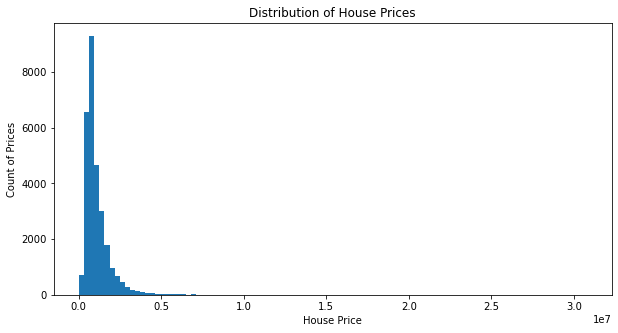

In [29]:
#A visualization of the distribution of the target variable
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("House Price")
ax.set_ylabel("Count of Prices")
ax.set_title("Distribution of House Prices");

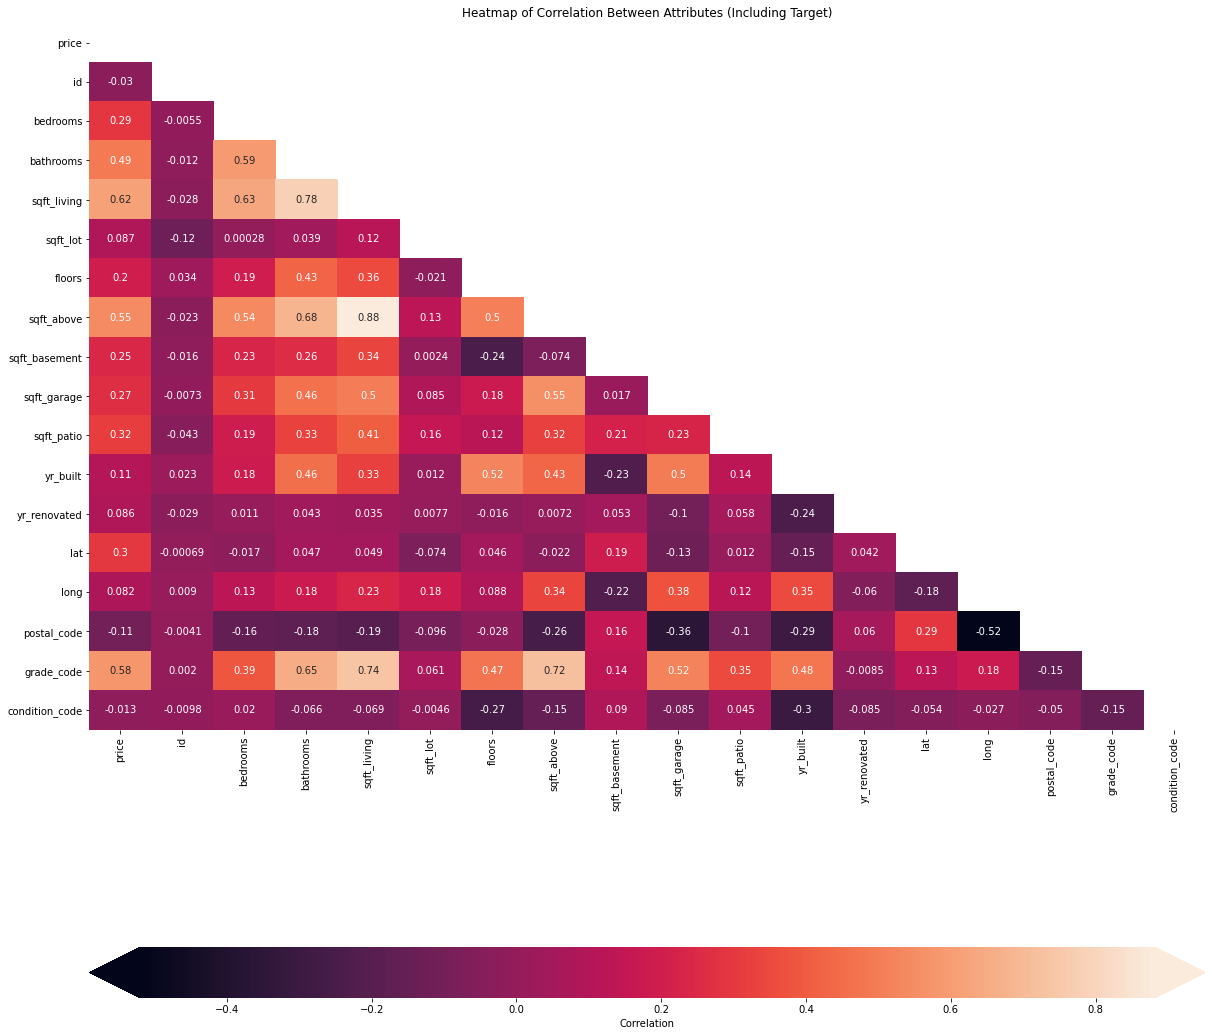

In [30]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

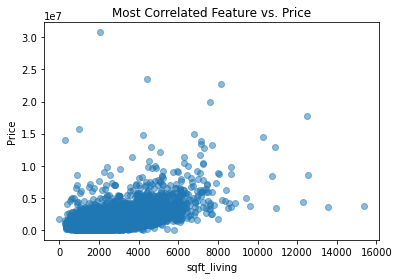

In [31]:
most_correlated_feature = "sqft_living"


fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

# Price Outlier Removal For Homes within 1 std dev

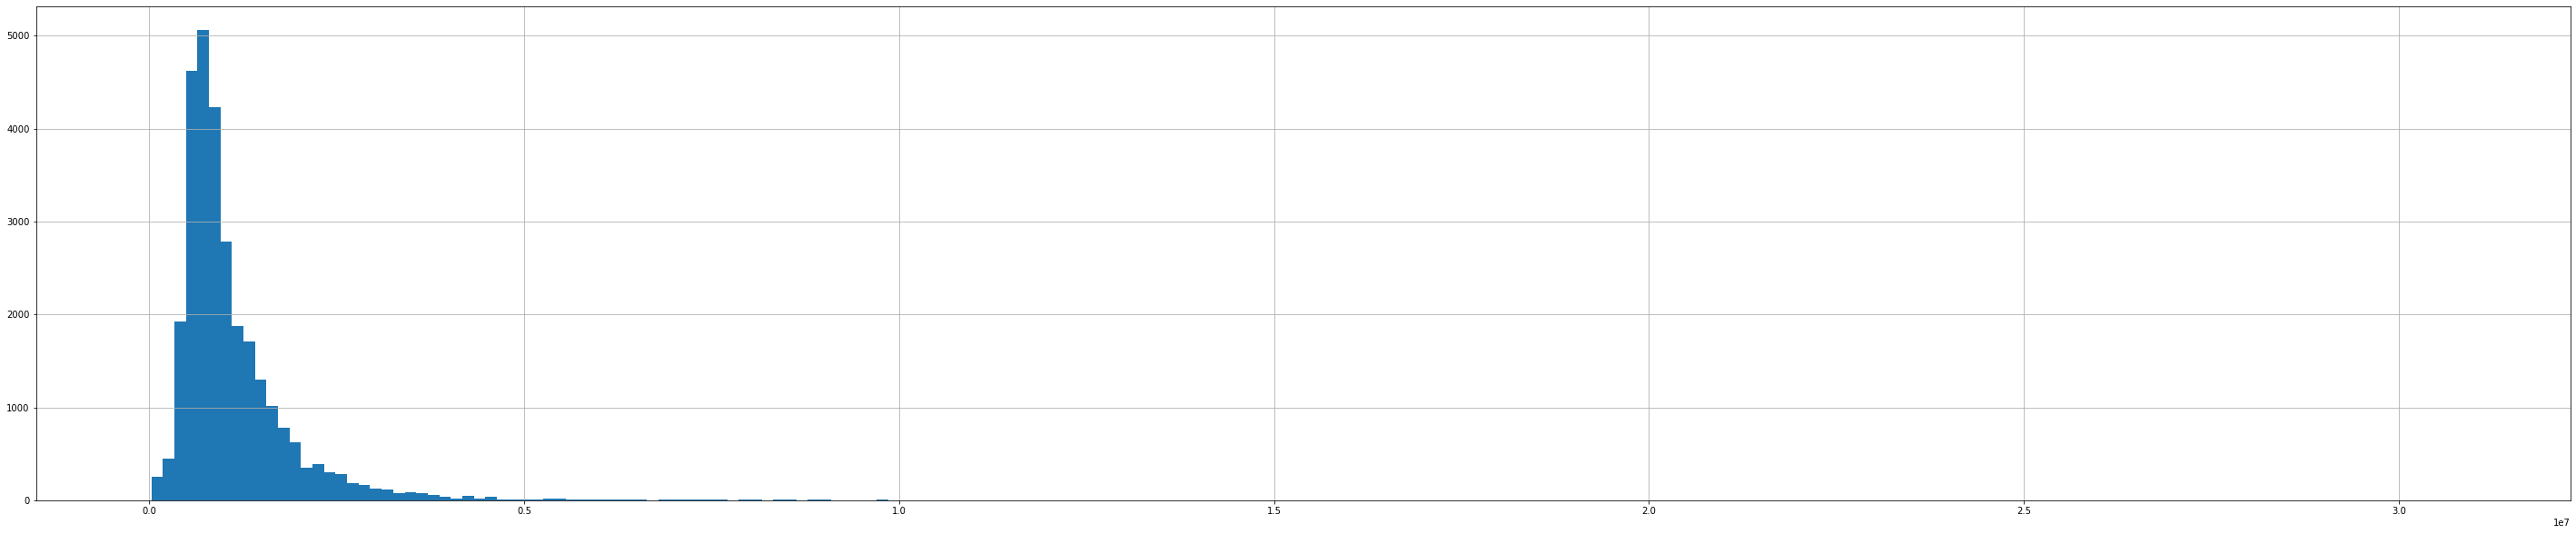

In [32]:
only_king['price'].hist(bins=200, figsize=(50,10));

In [33]:
only_king.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,7,4
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,7,3
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,7,3
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,9,3
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,7,3


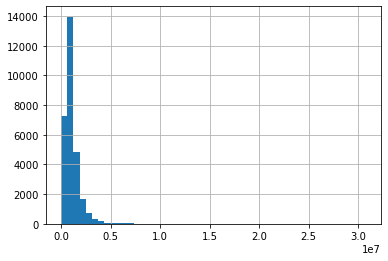

In [34]:
# log in order to make it more normal by scaling
y = only_king['price']
y.hist(bins=50);

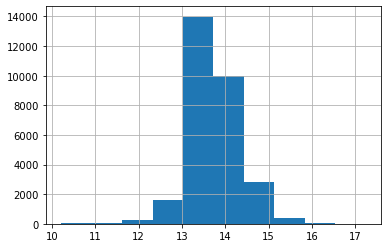

In [35]:
y_scld = np.log(y)
y_scld.hist();

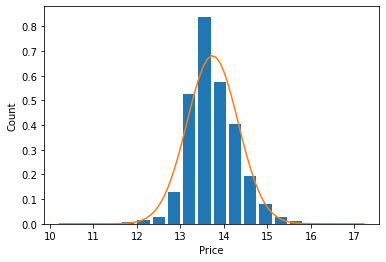

In [36]:
plt.hist(y_scld, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(y_scld.min(), y_scld.max(), 0.1)
plt.plot(rng, norm.pdf(rng,y_scld.mean(),y_scld.std()));

In [37]:
y_scld.describe()

count    29199.000000
mean        13.738294
std          0.585356
min         10.216837
25%         13.377006
50%         13.673947
75%         14.085538
max         17.241401
Name: price, dtype: float64

In [38]:
y_scld.std()

0.5853561820992081

In [39]:
y_scld.mean()

13.738294301050283

In [40]:
upper_limit = y_scld.mean() + 1*y_scld.std()
upper_limit

14.32365048314949

In [41]:
lower_limit = y_scld.mean() - 1*y_scld.std()
lower_limit

13.152938118951075

In [42]:
#Show me the homes where the price is beyond 2 standard deviations
only_king[(y_scld>upper_limit) | (y_scld<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200,98178,7,3
22,7231501575,12/28/2021,450000.0,2,1.0,900,6000,1.0,NO,NO,...,0,0,1941,0,"533 Wells Avenue South, Renton, Washington 980...",47.475360,-122.205730,98057,6,3
26,8682282030,5/4/2022,2000000.0,3,3.0,2700,7694,1.0,NO,NO,...,530,640,2006,0,"23837 NE Adair Rd, Redmond, Washington 98053, ...",47.708760,-122.020730,98053,9,3
27,5424700190,2/26/2022,4500000.0,4,3.0,2760,13150,1.5,NO,NO,...,0,160,1954,0,"8637 Northeast 6th Street, Medina, Washington ...",47.615710,-122.223990,98039,9,4
30,9320600110,8/18/2021,500000.0,3,1.5,1140,9690,1.0,NO,NO,...,550,0,1964,0,"9812 South 212th Street, Kent, Washington 9803...",47.411835,-122.209540,98031,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30132,723049462,4/20/2022,488000.0,3,1.0,1020,10352,1.0,NO,NO,...,350,0,1961,0,"825 Southwest 116th Street, Burien, Washington...",47.499100,-122.345270,98146,7,3
30139,6743700362,6/17/2021,2080000.0,4,2.5,3280,7200,2.0,NO,NO,...,570,140,2010,0,"12716 Northeast 106th Lane, Kirkland, Washingt...",47.695630,-122.171095,98033,9,3
30140,8081900170,3/29/2022,2650000.0,4,3.5,3270,9200,2.0,NO,NO,...,0,40,1925,0,"3303 Northwest 72nd Street, Seattle, Washingto...",47.680710,-122.400025,98117,9,4
30146,3915500105,12/3/2021,380000.0,3,1.0,860,7805,1.0,NO,NO,...,0,0,1947,0,"407 M Street Southeast, Auburn, Washington 980...",47.304110,-122.213920,98002,6,4


In [43]:
#Take out outliers
df = only_king[(y_scld<upper_limit) & (y_scld>lower_limit)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,98055,7,4
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,98133,7,3
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200,98118,9,3
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880,98027,7,3
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,98133,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,...,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.370620,98117,8,3
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.329400,98103,8,4
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.388510,98116,7,3
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.295850,98122,7,3


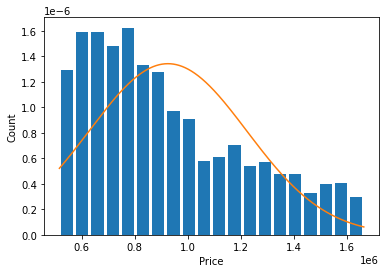

In [44]:
plt.hist(df.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(df.price.min(), df.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.price.mean(),df.price.std()));

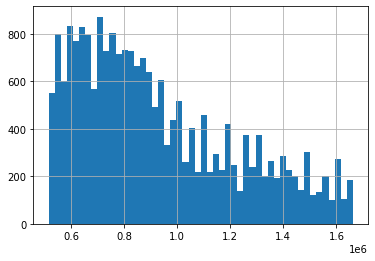

In [45]:
B = df['price']
B.hist(bins=50);

In [46]:
only_king['price'].describe()

count    2.919900e+04
mean     1.112959e+06
std      8.954250e+05
min      2.736000e+04
25%      6.450000e+05
50%      8.680000e+05
75%      1.310000e+06
max      3.075000e+07
Name: price, dtype: float64

In [47]:
df['price'].describe()

count    2.152300e+04
mean     9.244654e+05
std      2.971476e+05
min      5.159000e+05
25%      6.825000e+05
50%      8.500000e+05
75%      1.120000e+06
max      1.662000e+06
Name: price, dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21523 entries, 0 to 30153
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21523 non-null  int64  
 1   date            21523 non-null  object 
 2   price           21523 non-null  float64
 3   bedrooms        21523 non-null  int64  
 4   bathrooms       21523 non-null  float64
 5   sqft_living     21523 non-null  int64  
 6   sqft_lot        21523 non-null  int64  
 7   floors          21523 non-null  float64
 8   waterfront      21523 non-null  object 
 9   greenbelt       21523 non-null  object 
 10  nuisance        21523 non-null  object 
 11  view            21523 non-null  object 
 12  condition       21523 non-null  object 
 13  grade           21523 non-null  object 
 14  heat_source     21523 non-null  object 
 15  sewer_system    21523 non-null  object 
 16  sqft_above      21523 non-null  int64  
 17  sqft_basement   21523 non-null 

In [49]:
new_df = df.drop(columns=['id', 'date', 'condition', 'grade', 'heat_source', 'sewer_system', 'address', 
                                   'lat', 'long', 'yr_renovated', 'sqft_above', 'sqft_basement', 'waterfront',
                                   'greenbelt', 'nuisance', 'view', 'yr_built', 'sqft_patio'])

new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,postal_code,grade_code,condition_code
0,675000.0,4,1.0,1180,7140,1.0,0,98055,7,4
1,920000.0,5,2.5,2770,6703,1.0,0,98133,7,3
3,775000.0,3,3.0,2160,1400,2.0,200,98118,9,3
4,592500.0,2,2.0,1120,758,2.0,550,98027,7,3
5,625000.0,2,1.0,1190,5688,1.0,300,98133,7,3


# SCALE THE DATA

In [50]:
new_df.reset_index(drop=True,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('price', axis=1), new_df['price'], test_size=0.2, random_state=42)

In [51]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform both Train and Test
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [52]:
# Creates scaled features dataframe and then adds on price column

# Train
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = new_df.drop('price', axis=1).columns
y_train.reset_index(drop=True,inplace=True)
X_train_scaled_final = pd.concat((X_train_scaled,y_train),axis=1)
X_train.reset_index(drop=True,inplace=True)
X_train_final = pd.concat((X_train,y_train),axis=1)

# Test
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = new_df.drop('price', axis=1).columns
y_test.reset_index(drop=True,inplace=True)
X_test_scaled_final = pd.concat((X_test_scaled,y_test),axis=1)

# MODELING

## Baseline

In [53]:
# Baseline Model - Average Price of Train Dataset
baseline_mean = X_train_scaled_final['price'].mean()
model_base = DummyRegressor(strategy='mean', constant=baseline_mean)
baseline_mean

923530.5545940296

## Simple Model

In [54]:
# OLS Regression on Train Data for Simple Model

formula = 'price ~ bedrooms+bathrooms+sqft_living'
model = ols(formula,X_train_scaled_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1224.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:48:25   Log-Likelihood:            -2.3971e+05
No. Observations:               17218   AIC:                         4.794e+05
Df Residuals:                   17214   BIC:                         4.794e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.235e+05   2051.035    450.275      0.000     9.2e+05    9.28e+05
bedrooms    -1.756e+04   2658.913     -6.606      0.000   -2.28e+04   -1.24e+04
bathrooms    7297.2025   2838.070      2.571      0.010    1734.297    1.29e+04
sqft_living  1.295e+05   3080.185     42.028      0.000    1.23e+05    1.35e+05
==============================================================================
Omnibus:                     1035.534   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1181.132
Skew:                           0.625   Prob(JB):                    3.32e-257
Kurtosis:                       2.711   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from sklearn.metrics import r2_score

# Check R2 of Test Data
y_test_pred = model.predict(X_test_scaled_final)
print('R2 of Test Model with Test Data:',round(r2_score(y_test,y_test_pred),3))

R2 of Test Model with Test Data: 0.182


In [56]:
# OLS Regression on Train Data for Simple Model

formula = 'price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+sqft_garage+postal_code+grade_code+condition_code'
model = ols(formula,X_train_scaled_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     599.5
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:42   Log-Likelihood:            -2.3902e+05
No. Observations:               17218   AIC:                         4.781e+05
Df Residuals:                   17208   BIC:                         4.781e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.235e+05   1971.551    468.428      0.000     9.2e+05    9.27e+05
bedrooms       -7777.6927   2633.225     -2.954      0.003   -1.29e+04   -2616.303
bathrooms       3474.8755   2921.003      1.190      0.234   -2250.588    9200.339
sqft_living     9.827e+04   3334.785     29.470      0.000    9.17e+04    1.05e+05
sqft_lot        7810.6780   2018.447      3.870      0.000    3854.316    1.18e+04
floors         -2.679e+04   2379.895    -11.256      0.000   -3.15e+04   -2.21e+04
sqft_garage    -3.892e+04   2434.923    -15.983      0.000   -4.37e+04   -3.41e+04
postal_code     7753.3992   2168.225      3.576      0.000    3503.458     1.2e+04
grade_code      9.475e+04   2756.061     34.379      0.000    8.93e+04       1e+05
condition_code  2.566e+04   2096.246     12.242      0.000    2.16e+04    2.98e+04
==============================================================================
Omnibus:                      970.579   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.375
Skew:                           0.631   Prob(JB):                    3.18e-249
Kurtosis:                       2.958   Cond. No.                         3.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
new_df['floors'].unique()

In [ ]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

df_no_outliers['in_Seattle'] = np.where(df_no_outliers['postal_code'].isin(Seattle_postalcodes),1,0)

In [ ]:
df_no_outliers['in_Seattle'].value_counts()

In [ ]:
Seattle_Homes = df_no_outliers.loc[df_no_outliers['in_Seattle'] == 1]
Seattle_Homes['price'].describe()

In [ ]:
NotSeattle_Homes = df_no_outliers.loc[df_no_outliers['in_Seattle'] == 0]
NotSeattle_Homes['price'].describe()

In [ ]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
X = df_no_outliers

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as MSE


X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='price'),X.price, test_size = .25, random_state = 420)

training_data = pd.concat([X_train,y_train], axis = 1)
testing_data = pd.concat([X_test,y_test], axis = 1)

dummy_regr = DummyRegressor(strategy = 'mean')
dummy_regr.fit(X_train,y_train)
dummy_regr.predict(X_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_train, y_train)
dummy_regr.score(X_test, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train),squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')

In [ ]:
df_scaled = (df_no_outliers - np.mean(df_no_outliers)) / np.std(df_no_outliers)
df_scaled.head()

In [ ]:
df_scaled.describe()

In [ ]:
df_preds = df_scaled.drop('price', axis=1)
df_target = df_scaled['price']

df_preds_scaled = (df_preds - np.mean(df_preds)) / np.std(df_preds)
predictors = sm.add_constant(df_preds_scaled)

model = sm.OLS(df_target, predictors).fit()
model.summary()

In [ ]:
plt.hist(df_scaled);

In [ ]:
df.corr()

In [ ]:
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']

In [ ]:
df.corr()

In [ ]:
df_preds_scaled.corr()

In [ ]:
df.price.describe()

In [ ]:
from scipy.stats import norm
import numpy as np


plt.hist(df.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(df.price.min(), df.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.price.mean(),df.price.std()));